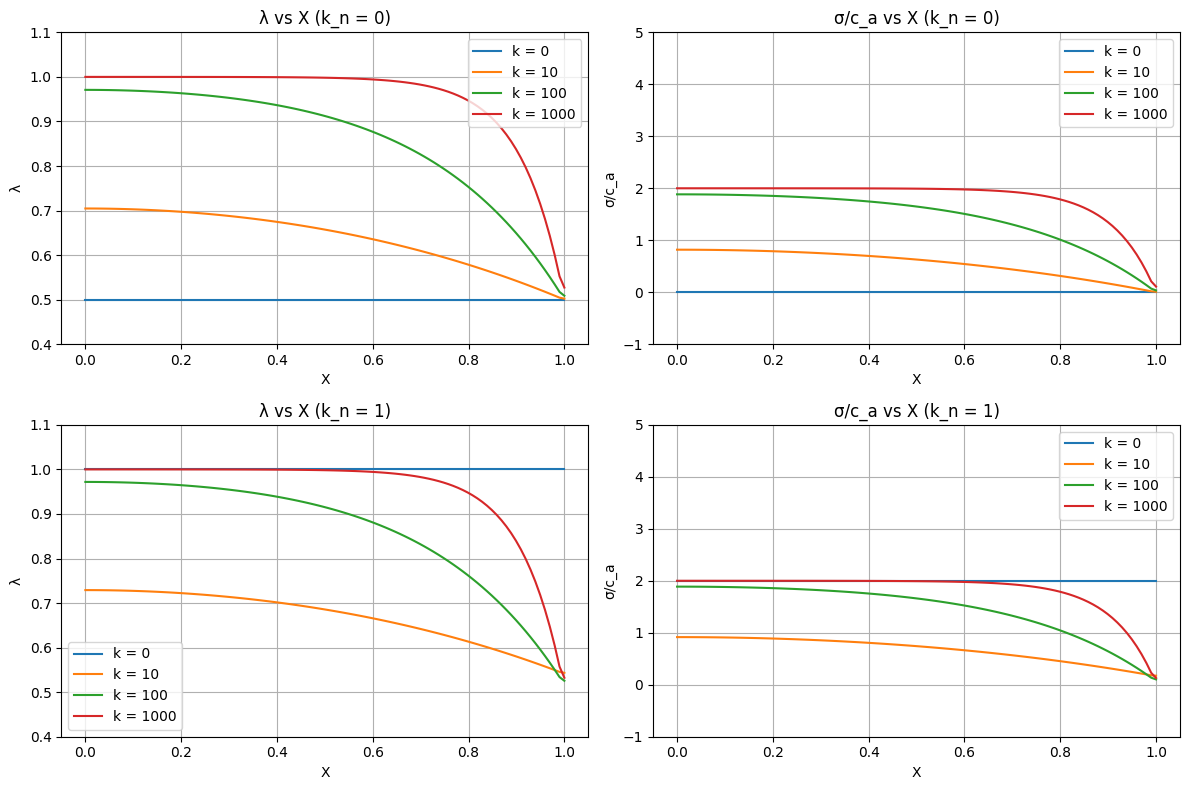

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

L = 1.0          # Undformed length
A0 = 0.01        # Cross-sectional area
c_a = 1.0        # Active strain-energy density coefficient
K = 0.5          # Uniform contraction magnitude
k_values = [0, 10, 100, 1000]  # Cytoskeletal stiffness values
k_n_values = [0, 1]            # Nuclear stiffness values

X = np.linspace(0, L, 100)

def fun_alpha(k):
    if k == 0:
        return 0
    return np.sqrt(k * K**2 / (2 * c_a))

def fun_u(X, k, k_n):
    alpha = fun_alpha(k)
    beta = k_n * K**2 / (2 * c_a)
    if alpha == 0 and beta == 0:
        return (K - 1) * X / L
    denominator = alpha * np.cosh(alpha * L) + beta * np.sinh(alpha * L)
    C1 = (K - 1) / denominator if denominator != 0 else 0
    u = C1 * np.sinh(alpha * X)
    return u

def lamda(X, u):
    return 1 + np.gradient(u, X)

def fun_sigma(X, u, k):
    lambda_val = lamda(X, u)
    return 2 * c_a * (lambda_val / K - 1)

plt.figure(figsize=(12, 8))

for i, k_n in enumerate(k_n_values):
    for j, k in enumerate(k_values):
        u = fun_u(X, k, k_n)
        lambda_val = lamda(X, u)
        sigma = fun_sigma(X, u, k)
        plt.subplot(2, 2, 1 + i * 2)
        plt.plot(X, lambda_val, label=f'k = {k}')
        plt.title(f'λ vs X (k_n = {k_n})')
        plt.xlabel('X')
        plt.ylabel('λ')
        plt.grid(True)
        plt.legend()
        plt.ylim(0.4, 1.1)

        plt.subplot(2, 2, 2 + i * 2)
        plt.plot(X, sigma / c_a, label=f'k = {k}')
        plt.title(f'σ/c_a vs X (k_n = {k_n})')
        plt.xlabel('X')
        plt.ylabel('σ/c_a')
        plt.grid(True)
        plt.legend()
        plt.ylim(-1, 5)

plt.tight_layout()
plt.show()